In [1]:
import os
import glob

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict


exact_tour_weights = {
    'a280' : 2579,
    'ali535' : 202310,
    'att48' : 10628,
    'att532' : 27686,
    'bayg29' : 1610,
    'bays29' : 2020,
    'berlin52' : 7542,
    'bier127' : 118282,
    'brazil58' : 25395,
    'brd14051' : [468942,469445],
    'brg180' : 1950,
    'burma14' : 3323,
    'ch130' : 6110,
    'ch150' : 6528,
    'd198' : 15780,
    'd493' : 35002,
    'd657' : 48912,
    'd1291' : 50801,
    'd1655' : 62128,
    'd2103' : [79952,80450],
    'd15112' : [1564590,1573152],
    'd18512' : [644650,645488],
    'dantzig42' : 699,
    'dsj1000' : 18659688,
    'eil51' : 426,
    'eil76' : 538,
    'eil101' : 629,
    'fl417' : 11861,
    'fl1400' : 20127,
    'fl1577' : [22204,22249],
    'fl3795' : [28723,28772],
    'fnl4461' : 182566,
    'fri26' : 937,
    'gil262' : 2378,
    'gr17' : 2085,
    'gr21' : 2707,
    'gr24' : 1272,
    'gr48' : 5046,
    'gr96' : 55209,
    'gr120' : 6942,
    'gr137' : 69853,
    'gr202' : 40160,
    'gr229' : 134602,
    'gr431' : 171414,
    'gr666' : 294358,
    'hk48' : 11461,
    'kroA100' : 21282,
    'kroB100' : 22141,
    'kroC100' : 20749,
    'kroD100' : 21294,
    'kroE100' : 22068,
    'kroA150' : 26524,
    'kroB150' : 26130,
    'kroA200' : 29368,
    'kroB200' : 29437,
    'lin105' : 14379,
    'lin318' : 42029,
    'linhp318' : 41345,
    'nrw1379' : 56638,
    'p654' : 34643,
    'pa561' : 2763,
    'pcb442' : 50778,
    'pcb1173' : 56892,
    'pcb3038' : 137694,
    'pla7397' : 23260728,
    'pla33810' : [65913275,66116530],
    'pla85900' : [141904862,142487006],
    'pr76' : 108159,
    'pr107' : 44303,
    'pr124' : 59030,
    'pr136' : 96772,
    'pr144' : 58537,
    'pr152' : 73682,
    'pr226' : 80369,
    'pr264' : 49135,
    'pr299' : 48191,
    'pr439' : 107217,
    'pr1002' : 259045,
    'pr2392' : 378032,
    'rat99' : 1211,
    'rat195' : 2323,
    'rat575' : 6773,
    'rat783' : 8806,
    'rd100' : 7910,
    'rd400' : 15281,
    'rl1304' : 252948,
    'rl1323' : 270199,
    'rl1889' : 316536,
    'rl5915' : [565040,565530],
    'rl5934' : [554070,556045],
    'rl11849' : [920847,923368],
    'si175' : 21407,
    'si535' : 48450,
    'si1032' : 92650,
    'st70' : 675,
    'swiss42' : 1273,
    'ts225' : 126643,
    'tsp225' : 3919,
    'u159' : 42080,
    'u574' : 36905,
    'u724' : 41910,
    'u1060' : 224094,
    'u1432' : 152970,
    'u1817' : 57201,
    'u2152' : 64253,
    'u2319' : 234256,
    'ulysses16' : 6859,
    'ulysses22' : 7013,
    'usa13509' : [19947008,19982889],
    'vm1084' : 239297,
    'vm1748' : 336556,
}

all_solution_names = [
    "NearestNeighbour",
    "MinimumSpanningTree",
    "NaiveSolution",
    "GeneticAlgorithm",
    "BranchAndBound"
]

In [2]:
def print_test_from_filename(test_name):
    fpath = os.path.join(os.getcwd(), "datasets", test_name + ".tsp")
    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
        
        start = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
                    
        for i in range(len(content)):
            if content[i] == "NODE_COORD_SECTION":
                start = i + 1;
                
        if start == 0:
            return None;
        return content[start:-1]
    
def print_test_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        content_size = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if tokens[0] == "DIMENSION":
                content_size = int(tokens[1])
            
            if content[i] == "NODE_COORD_SECTION" or content[i] == "DISPLAY_DATA_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        if content_size != len(content):
            new_content = []
            for line in content:
                if line != "EOF" and len(line) > 4:
                    new_content.append(line)
            return new_content
        
        return content
    

In [3]:
def get_x_and_y(content, fpath):
    x = []
    y = []
    for line in content:
        tokens = line.split()
        if (len(tokens) != 3):
            print()
            print("invalid tokens: ", fpath, tokens)
        x.append(float(tokens[1]))
        y.append(float(tokens[2]))
        
    return x, y

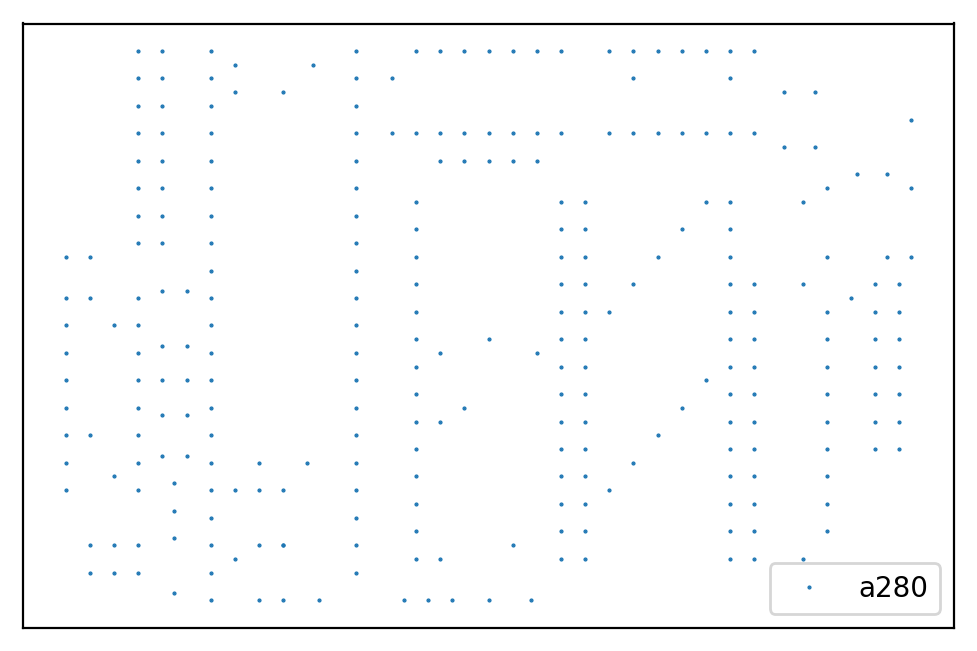

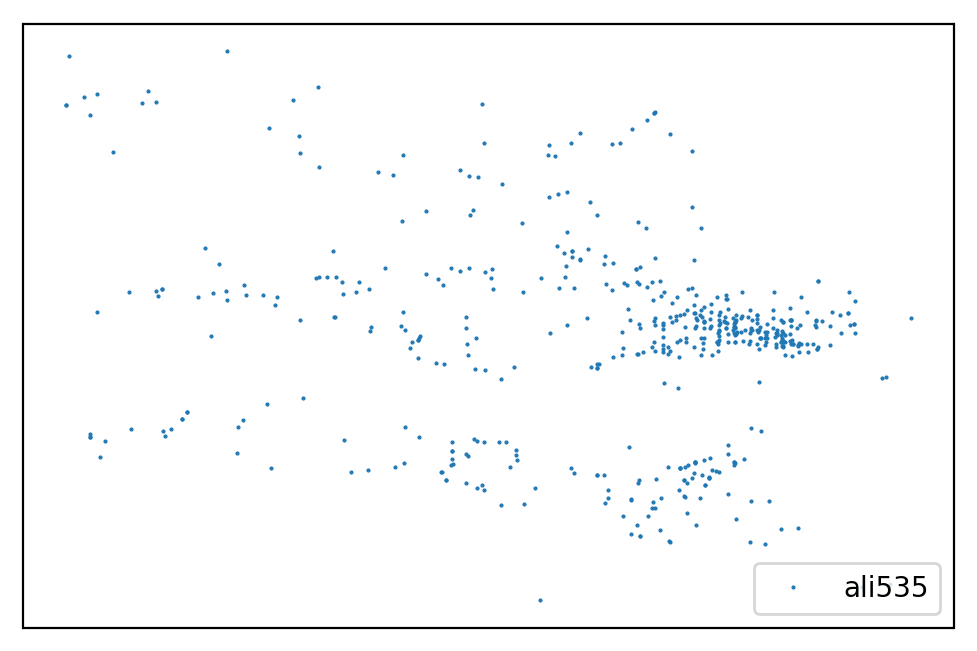

In [4]:
all_test_paths = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", "*.tsp")))
tests_amount = len(all_test_paths)
tests_amount = 2

for i in range(tests_amount):
    points = print_test_from_filepath(all_test_paths[i])
    test_name = all_test_paths[i].split("/")[-1][:-4];
    if (points != None):
        x, y = get_x_and_y(points, all_test_paths[i])

        fig, ax = plt.subplots(dpi=200)
        
        plt.plot(x, y, 'o', marker='.', markersize=1, scalex=True, scaley=True, label=test_name)
        plt.legend(loc='lower right')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.show()
    else:
        print("matrix in test {}".format(test_name))
        
        

In [5]:
def print_tour_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        content_size = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if tokens[0] == "DIMENSION":
                content_size = int(tokens[1])
            
            if content[i] == "TOUR_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        if content_size != len(content):
            new_content = []
            for line in content:
                if line != "EOF" and int(line) != -1:
                    new_content.append(line)
                    
            print("size ", len(new_content), content_size)
            return new_content
        
        return content
    
def get_best_weight_for_test_solution(test, solution):
    solution_tour_paths = sorted(glob.glob(os.path.join(os.getcwd(), "results", 
                                                       test + "_" + solution + "_" + "*.tour")), key=str.lower)
    best_weight = defaultdict(lambda : 10**18)
    time_ms_best = defaultdict(lambda : 10**18)
    for fpath in solution_tour_paths:
        if not os.path.isfile(fpath):
            print('File does not exist.')
        else:
            with open(fpath) as f:
                content = f.read().splitlines()
                weight = 10**18
                optimizer = ''
                time_ms = None
                for i in range(len(content)):
                    if(content[i].count('WEIGHT')):
                        weight =int(content[i].split(':')[-1].strip())
                    if content[i].count('OPTIMIZER'):
                        optimizer = content[i].split(':')[-1].strip()
                    if content[i].count('TIME'):
                        time_ms = float(content[i].split(':')[-1].strip())
                if weight < best_weight[optimizer]:
                    best_weight[optimizer] = weight
                    time_ms_best[optimizer] = time_ms
                
    return best_weight, time_ms_best   

In [6]:
def get_number(path):
    return int(path.split("_")[-1].split(".")[0])
    
def plot_tour_by_testname_and_solution(testname, solution):
    tour_path = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", testname + ".opt.tour")))[-1]
    solution_tour_path = sorted(glob.glob(os.path.join(os.getcwd(), "results", 
                                                       testname + "_" + solution + "_" + "*.tour")), key=get_number)[-1]
    
    test_path = sorted(glob.glob(os.path.join(os.getcwd(), "datasets", testname + ".tsp")))[-1]
    print(solution_tour_path, tour_path, test_path)

    points = print_test_from_filepath(test_path)
    permute = print_tour_from_filepath(tour_path)
    our_permute = print_tour_from_filepath(solution_tour_path)


    if(tour_path == None or solution_tour_path == None or test_path == None):
        print("smth is None")
        print(test_path, tour_path, solution_tour_path)
        return 

    if (points != None):
        x, y = get_x_and_y(points, test_path)
        new_x = []
        new_y = []
        for index in permute:
            v = int(index)
            new_x.append(x[v - 1])
            new_y.append(y[v - 1])
        new_x.append(new_x[0])
        new_y.append(new_y[0])

        our_x = []
        our_y = []
        for index in our_permute:
            v = int(index)
            our_x.append(x[v])
            our_y.append(y[v])
        our_x.append(our_x[0])
        our_y.append(our_y[0])
        
        from math import sqrt
        res = 0
        for i in range(len(our_x) - 1):
            res += int(sqrt((our_x[i] - our_x[i + 1]) ** 2 + (our_y[i] - our_y[i + 1]) ** 2) + 0.5)
        print('res ~= ', res)
        
        assert len(our_permute) == len(permute)
        assert sorted(list(set(our_permute))) == sorted(our_permute)

        fig, ax = plt.subplots(dpi=170)

        plt.plot(new_x, new_y, 
                 linewidth=0.4, 
                 marker='.', markersize=1, 
                 color="#673ab7",
                 markeredgecolor="black",
                 label=testname + ' tour')

        plt.plot(our_x, our_y, 
                 linewidth=0.4, 
                 marker='.', markersize=1, 
                 color="#4cd964",
                 markeredgecolor="black",
                 label=testname + ' ' + solution)

        plt.legend(loc='lower right', prop={'size': 4})
        plt.xticks([], [])
        plt.yticks([], [])

        plt.show()
    else:
        print("matrix in test {}".format(testname))
            
# todo: search by test name all solution in results

/Users/gwyrwch/Projects/course-work-5/results/a280_NaiveSolution_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280
res ~=  2808


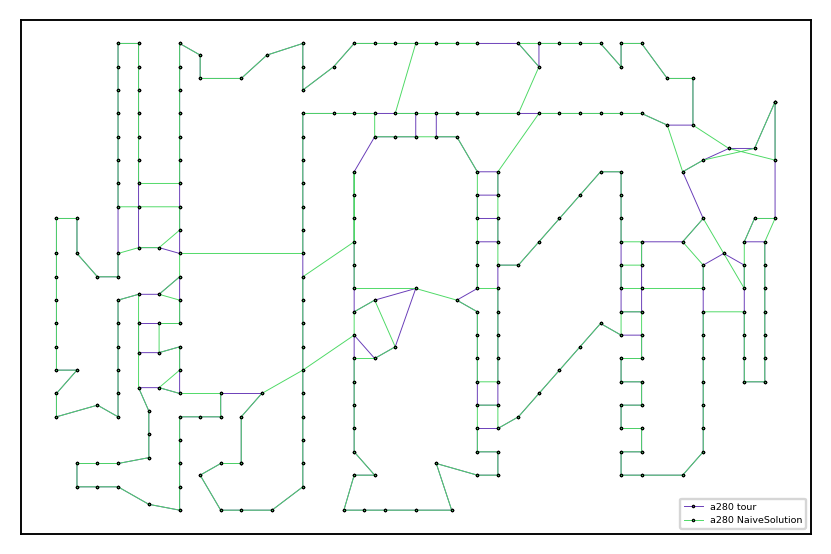

/Users/gwyrwch/Projects/course-work-5/results/tsp225_NaiveSolution_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.tsp
size  225 0
size  225 225
res ~=  10349


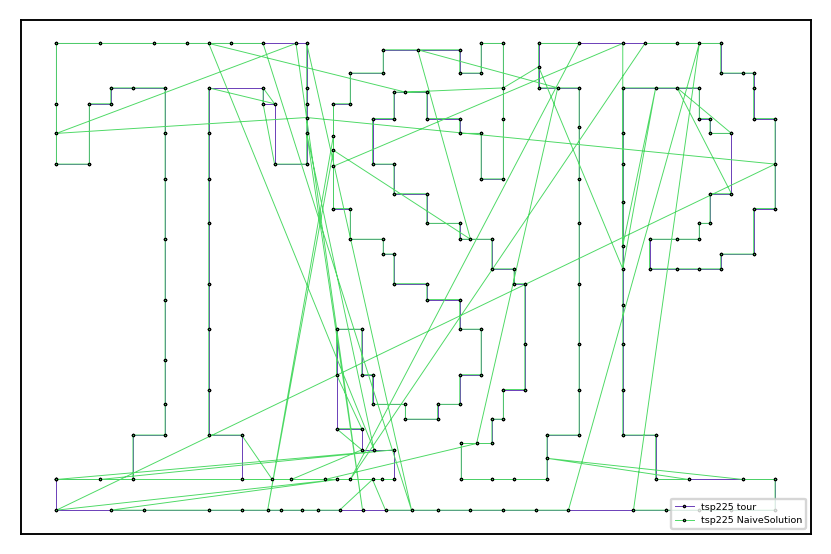

In [62]:
plot_tour_by_testname_and_solution('a280', 'NaiveSolution')
plot_tour_by_testname_and_solution('tsp225', 'NaiveSolution')

/Users/gwyrwch/Projects/course-work-5/results/a280_NearestNeighbour_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280
res ~=  3157


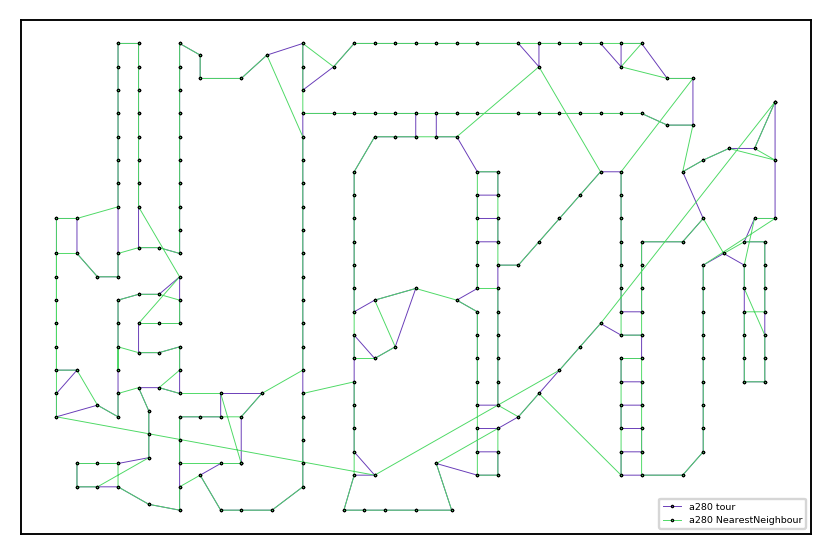

/Users/gwyrwch/Projects/course-work-5/results/tsp225_NearestNeighbour_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.tsp
size  225 0
size  225 225
res ~=  5030


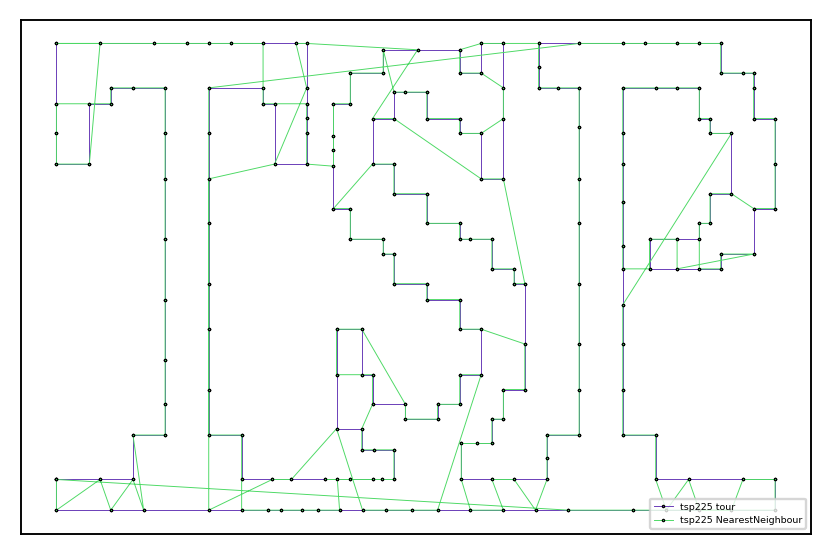

In [12]:
plot_tour_by_testname_and_solution('a280', 'NearestNeighbour')
plot_tour_by_testname_and_solution('tsp225', 'NearestNeighbour')

/Users/gwyrwch/Projects/course-work-5/results/a280_GeneticAlgorithm_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280
res ~=  26751


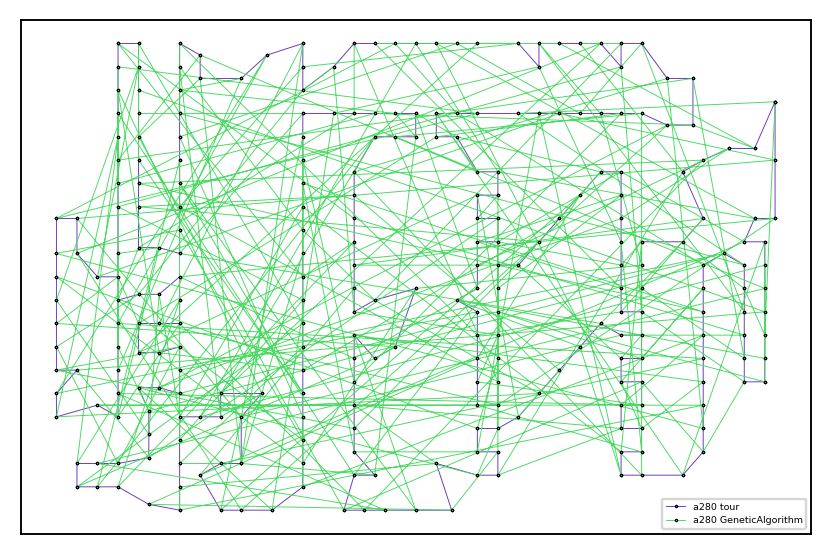

/Users/gwyrwch/Projects/course-work-5/results/tsp225_GeneticAlgorithm_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.tsp
size  225 0
size  225 225
res ~=  31022


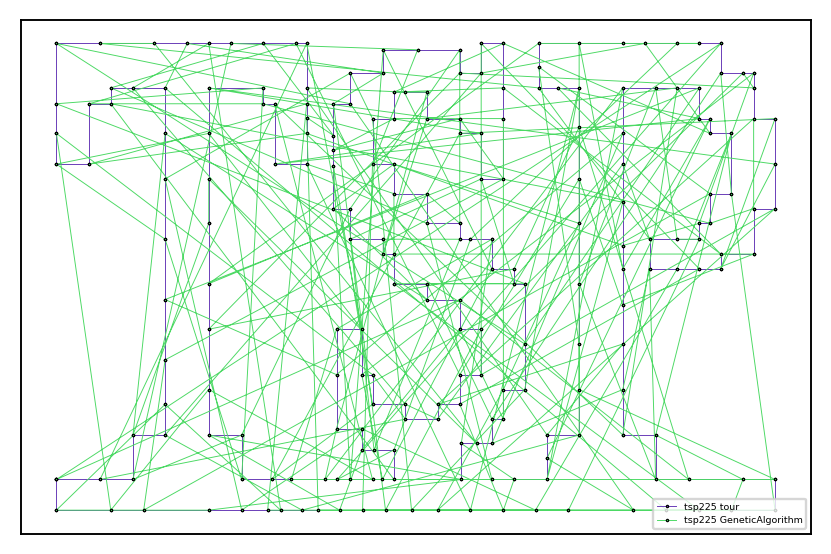

In [63]:
plot_tour_by_testname_and_solution('a280', 'GeneticAlgorithm')
plot_tour_by_testname_and_solution('tsp225', 'GeneticAlgorithm')

/Users/gwyrwch/Projects/course-work-5/results/a280_BranchAndBound_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280
res ~=  3157


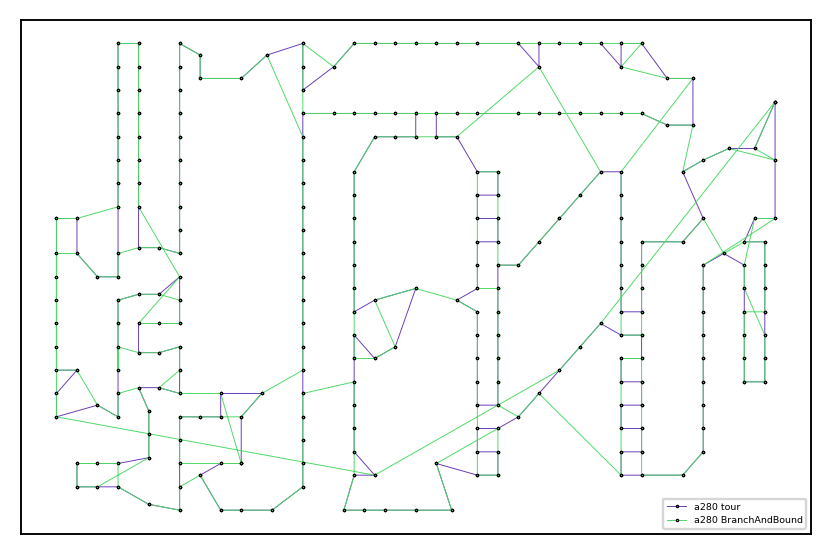

/Users/gwyrwch/Projects/course-work-5/results/tsp225_BranchAndBound_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.tsp
size  225 0
size  225 225
res ~=  5010


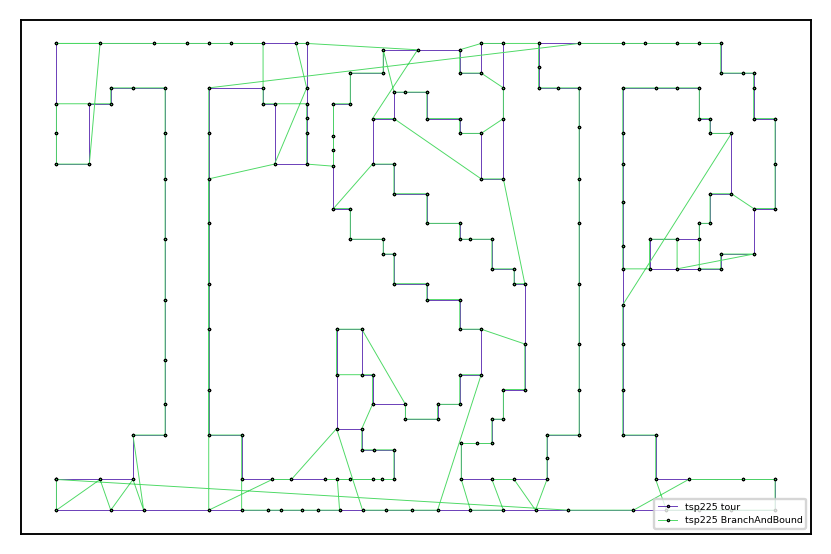

In [65]:
plot_tour_by_testname_and_solution('a280', 'BranchAndBound')
plot_tour_by_testname_and_solution('tsp225', 'BranchAndBound')

/Users/gwyrwch/Projects/course-work-5/results/a280_MinimumSpanningTree_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/a280.tsp
size  280 0
size  280 280
res ~=  2808


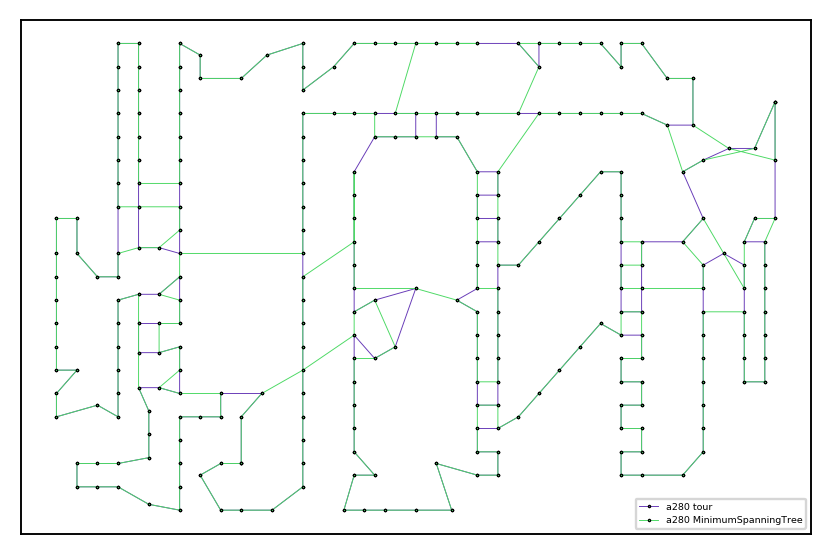

/Users/gwyrwch/Projects/course-work-5/results/tsp225_MinimumSpanningTree_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/tsp225.tsp
size  225 0
size  225 225
res ~=  5063


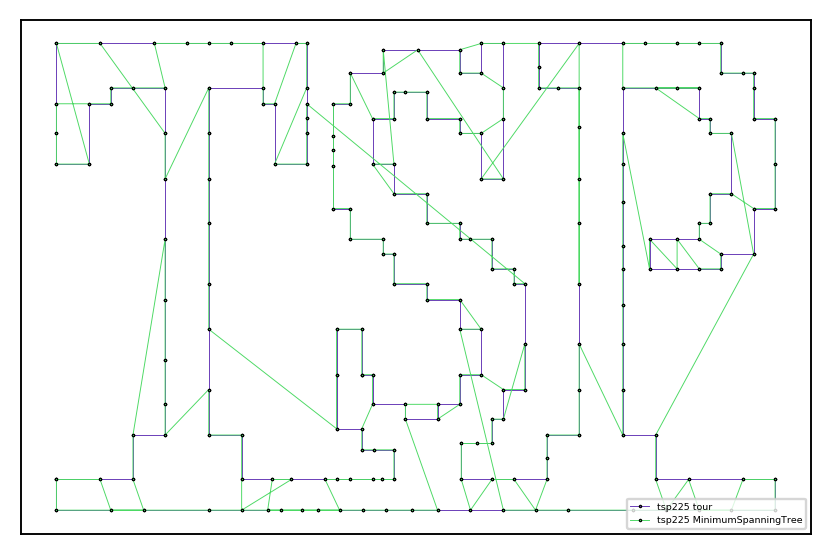

In [67]:
plot_tour_by_testname_and_solution('a280', 'MinimumSpanningTree')
plot_tour_by_testname_and_solution('tsp225', 'MinimumSpanningTree')

In [ ]:
plot_tour_by_testname_and_solution('att48', 'GeneticAlgorithm')

In [ ]:
plot_tour_by_testname_and_solution('ch130', 'NaiveSolution')

/Users/gwyrwch/Projects/course-work-5/results/pr76_GeneticAlgorithm_19.tour /Users/gwyrwch/Projects/course-work-5/datasets/pr76.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/pr76.tsp
size  76 0
size  76 76
res ~=  199276


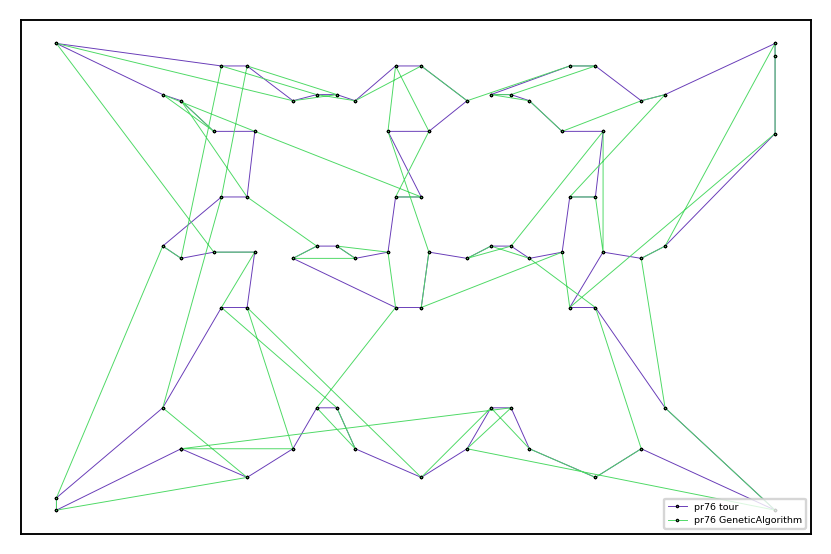

In [144]:
# plot_tour_by_testname_and_solution('bayg29', 'NearestNeighbour')
plot_tour_by_testname_and_solution('pr76', 'GeneticAlgorithm')

/Users/gwyrwch/Projects/course-work-5/results/rd100_GeneticAlgorithm_4.tour /Users/gwyrwch/Projects/course-work-5/datasets/rd100.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/rd100.tsp
size  100 0
size  100 100
res ~=  11390


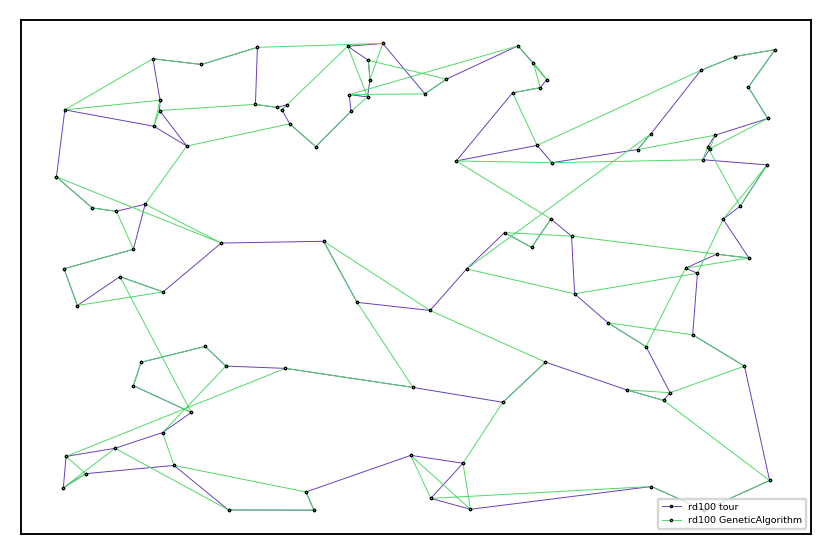

In [103]:
plot_tour_by_testname_and_solution('rd100', 'GeneticAlgorithm')

In [8]:
def get_score_for_solution(solution):
    solution_tour_paths = sorted(glob.glob(os.path.join(os.getcwd(), "results", 
                                                       "*_" + solution + "_" + "*.tour")), key=str.lower)
    
    if (len(solution_tour_paths) == 0):
        return []
    all_test_names = list(set([path.split("_")[0].split("/")[-1] for path in solution_tour_paths]))
    
    my_weight = defaultdict(int)
    test_names = defaultdict(list)
    time_ms = defaultdict(list)
    
    for test in all_test_names:
        best_weights, times = get_best_weight_for_test_solution(test, solution)
        for opt, w in best_weights.items():
            my_weight[opt] += w
            test_names[opt] += [test]
            time_ms[opt] += [times[opt]]

    # solution, {LocalSearch: 15, '': 20}
    
    result = []
    for opt, weight in my_weight.items():
        exact = 0
        for test_name in test_names[opt]:
            if type(exact_tour_weights[test_name]) == int:
                exact += exact_tour_weights[test_name]
            else:
                continue
        times = np.array(time_ms[opt])
        result += [(opt, (weight - exact) / exact, ', '.join(test_names[opt]), times.min(), times.max(), times.sum() / len(times))]
    return result

In [66]:
cols = ["solution", "optimizer", "score", "test_run", "time_ms_min", "time_ms_max", "time_ms_avg"]
df = pd.DataFrame(columns=cols)
for solution in all_solution_names:
    scores = get_score_for_solution(solution)
    for opt, score, test_names, time_min, time_max, time_avg in scores:
        df = pd.concat([df, pd.DataFrame([[solution, opt, score, test_names, time_min, time_max, time_avg]], columns=cols)], axis=0)
df = df.sort_values(by='score')
df = df.set_index(np.arange(0, df.shape[0]))
df

,solution,optimizer,score,test_run,time_ms_min,time_ms_max,time_ms_avg
0,GeneticAlgorithm,SimulatedAnnealing,1.518822,ch130,20024.0,20024.0,20024.000000
1,NaiveSolution,SimulatedAnnealing,1.529296,ch130,13000.0,13000.0,13000.000000
2,NearestNeighbour,,5.895183,"fl417, si175, si1032, kroE100, u159, si535, gi...",0.0,1246060.0,14945.846847
3,MinimumSpanningTree,,53.771919,"fl417, si175, si1032, kroE100, u159, si535, gi...",0.0,154276.0,5805.171171
4,NaiveSolution,,68.784477,"fl417, si175, si1032, kroE100, u159, si535, gi...",3000.0,3206.0,3035.468468
5,BranchAndBound,,906.055804,"fl417, si175, si1032, kroE100, u159, si535, gi...",8.0,35038.0,5188.018018
6,GeneticAlgorithm,,912.363858,"fl417, si175, si1032, kroE100, u159, si535, gi...",3004.0,16094.0,3354.729730


/Users/gwyrwch/Projects/course-work-5/results/eil76_MinimumSpanningTree_0.tour /Users/gwyrwch/Projects/course-work-5/datasets/eil76.opt.tour /Users/gwyrwch/Projects/course-work-5/datasets/eil76.tsp
size  76 0
size  76 76
res ~=  678


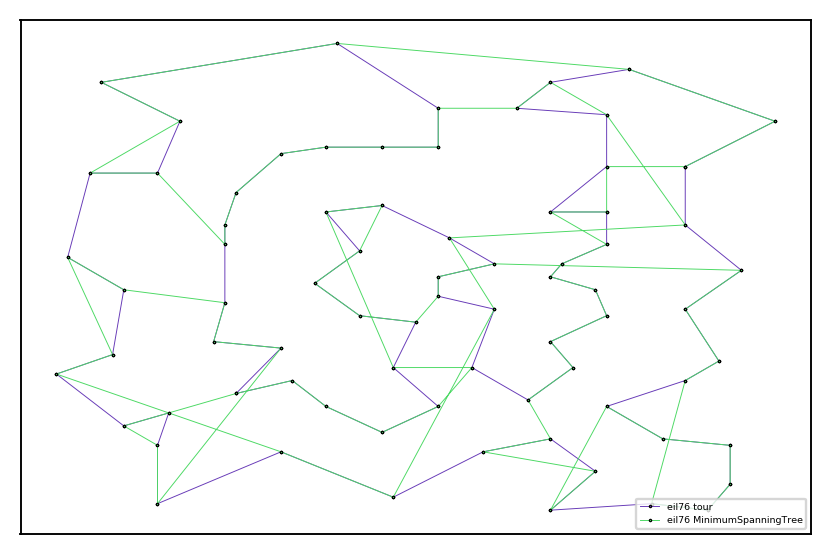

In [13]:
plot_tour_by_testname_and_solution('eil76', 'MinimumSpanningTree')

In [ ]:
plot_tour_by_testname_and_solution('st70', 'BranchAndBound')
 

In [ ]:
plot_tour_by_testname_and_solution('rd100', 'GeneticAlgorithm')


In [ ]:
plot_tour_by_testname_and_solution('pr2392', 'GeneticAlgorithm')

In [ ]:
plot_tour_by_testname_and_solution('ulysses22', 'GeneticAlgorithm')

In [ ]:
plot_tour_by_testname_and_solution('gr120', 'GeneticAlgorithm')

In [ ]:
plot_tour_by_testname_and_solution('kroA100', 'NearestNeighbour')

In [ ]:
print(2 in range(1,4))

In [45]:
def print_conv_from_filepath(fpath):    
    if not os.path.isfile(fpath):
        print('File does not exist.')
    else:
        with open(fpath) as f:
            content = f.read().splitlines()
            
        
        start = 0;
        for i in range(len(content)):
            content[i] = content[i].strip()
            
            tokens = content[i].split(":")
            for token in tokens:
                token = token.strip()
            
            if content[i] == "CONVERGENCE_SECTION":
                start = i + 1;
                break;
                
        if start == 0:
            return None;
        
        content = content[start:]
    
        new_content = []
        for line in content:
            if line != '-1':
                new_content.append(line)

        print("size ", len(new_content))
        
        
        x = []
        y = []
        for line in new_content:
            tokens = line.split(' ')
            if (len(tokens) != 2):
                print(tokens)
                raise
            px, py = tokens[0], tokens[1]    
            x.append(int(px))
            y.append(int(py))
        
        return x, y
        
    

In [156]:
testname = "ali535"
solution = "NaiveSolution"
solution_conv_path = sorted(
    glob.glob(
        os.path.join(
            os.getcwd(), 
            "convergence", 
            testname + "_" + solution + "_" + "*.conv"
      )
), key=get_number)[-1]

size  31
202310


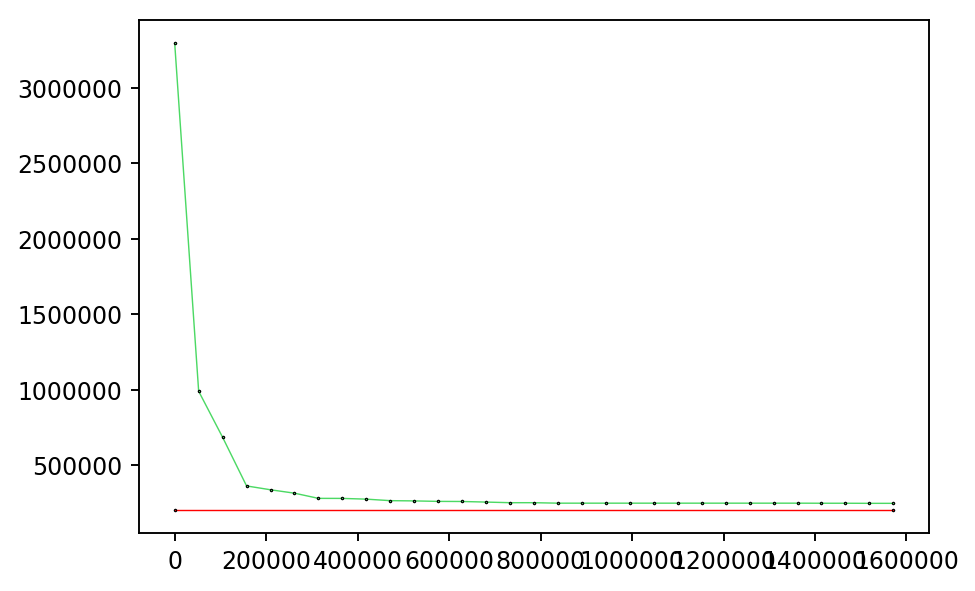

In [157]:
x, y = print_conv_from_filepath(solution_conv_path)
print(exact_tour_weights[testname])

fig, ax = plt.subplots(dpi=170)
plt.plot(x, y, 
         linewidth=0.6, 
         marker='.', markersize=1, 
         color="#4cd964",
         markeredgecolor="black",
         label=testname + ' ' + solution)

plt.plot([x[0], x[-1]], [exact_tour_weights[testname], exact_tour_weights[testname]], 
         linewidth=0.6, 
         marker='.', markersize=1, 
         color="red",
         markeredgecolor="black",
         label=testname + ' ' + solution)

# plt.xticks([], [])
# plt.yticks([], [])